In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_06_02 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
base='sims/2023-07-06'
deficit_base='sims/2023-06-02'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

## Just do the contrast with no jitter

In [4]:
rf_size=19
eta=1e-6
number_of_neurons=25
number_of_processes=4
mu_c=0
sigma_c=0
blur=8       # <========================
open_eye_noise=0.1

mu_c_mat=[0,7.5,0,7.5]
sigma_c_mat=[0,2,2,0]
contrast_mat=linspace(0,1,21)  # linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,30,50,70,90])


contrast_mat

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [5]:
from collections import namedtuple


params = namedtuple('params', ['count', 'eta','blur','contrast','f','mask','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0


for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for mask in mask_mat:
        if mask:
            for fc,f in enumerate(f_mat):
                for contrast_count,contrast in enumerate(contrast_mat):
                    all_params.append(params(count=count,
                                 eta=eta,
                                     blur=blur,
                                             contrast=contrast,
                                             f=f,
                                             mask=mask,
                                 number_of_neurons=number_of_neurons,
                                sfname=f'{base}/contrast mask {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {contrast:.2f} contrast {mask} mask {f} f.asdf',
                                mu_c=mu_c,sigma_c=sigma_c))

                    count+=1

        else:
            f=10
            for contrast_count,contrast in enumerate(contrast_mat):
                all_params.append(params(count=count,
                             eta=eta,
                                 blur=blur,
                                         contrast=contrast,
                                         f=f,
                                         mask=mask,
                             number_of_neurons=number_of_neurons,
                            sfname=f'{base}/contrast mask {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {contrast:.2f} contrast {mask} mask {f} f.asdf',
                            mu_c=mu_c,sigma_c=sigma_c))

                count+=1



for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)

print(len(all_params))

params(count=0, eta=1e-06, blur=8, contrast=0.0, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-07-06/contrast mask 25 neurons 0 mu_c 0 sigma_c 8 blur 0.00 contrast 0 mask 10 f.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, blur=8, contrast=0.05, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-07-06/contrast mask 25 neurons 0 mu_c 0 sigma_c 8 blur 0.05 contrast 0 mask 10 f.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, blur=8, contrast=0.1, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-07-06/contrast mask 25 neurons 0 mu_c 0 sigma_c 8 blur 0.10 contrast 0 mask 10 f.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, blur=8, contrast=0.15000000000000002, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-07-06/contrast mask 25 neurons 0 mu_c 0 sigma_c 8 blur 0.15 contrast 0 mask 10 f.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, blur=8, contrast=0.2, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-07-06/contrast mask 25 neurons 0 mu_c 0 

In [6]:
blur

8

## Functions for contrast mask

In [7]:
def run_one_continuous_mask_jitter(params,
                                    overwrite=False,
                                 run=True):
    import plasticnet as pn
    count,eta,blur,contrast,mask,f,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.blur,params.contrast,params.mask,params.f,
                                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    
    if os.path.exists(sfname):
        if not overwrite:
            return sfname
        else:
            os.remove(sfname)

    
    seq=pn.Sequence()
    deficit_base_sim=f'{deficit_base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf'

    seq+=treatment_jitter(f=f,
                   mask=mask,
                   contrast=contrast,
                   total_time=8*day,
                   eta=eta,
                          number_of_neurons=number_of_neurons,
                    mu_c=mu_c,sigma_c=sigma_c,
                   save_interval=20*minute)

    if run:
        
        seq_load(seq,deficit_base_sim)    
        
        seq.run(display_hash=False)
        pn.save(sfname,seq) 

    
    return sfname
    
    


In [8]:
func=run_one_continuous_mask_jitter

## Premake the image files

In [9]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
print("Base Image File:",base_image_file)


# somehow calling these functions breaks the multiprocessing?
# Process ForkPoolWorker-1:
#_pickle.UnpicklingError: NEWOBJ class argument isn't a type object


# so run this, then restart kernel, and then skip this cell
# until I can figure out why this does this
for params in all_params:
    func(params,overwrite=False,run=False)



Base Image File: asdf/bbsk081604_all_scale2.asdf


In [9]:
params

__main__.params

In [10]:
len(all_params)

504

## Run the sims

In [18]:
do_params=make_do_params(all_params)
len(do_params)

3

In [17]:
%%time
print(func.__name__)
func(all_params[0],overwrite=True)

run_one_continuous_mask_jitter
[.] Sequence Time Elapsed...3 m, 43.27 s
CPU times: user 3min 45s, sys: 1.87 s, total: 3min 47s
Wall time: 3min 50s


'sims/2023-07-06/contrast mask 25 neurons 0 mu_c 0 sigma_c 8 blur 0.00 contrast 0 mask 10 f.asdf'

In [19]:
real_time=3*60+ 27

In [20]:
if len(do_params)>13:
    for a in do_params[:5]:
        print(a)
    print("[....]")
    for a in do_params[-5:]:
        print(a)
else:
    for a in do_params:
        print(a)
    

print(len(do_params))

print(time2str(real_time*len(do_params)/number_of_processes))


params(count=493, eta=1e-06, blur=8, contrast=0.5, f=90, mask=1, number_of_neurons=25, sfname='sims/2023-07-06/contrast mask 25 neurons 7.5 mu_c 0 sigma_c 8 blur 0.50 contrast 1 mask 90 f.asdf', mu_c=7.5, sigma_c=0)
params(count=495, eta=1e-06, blur=8, contrast=0.6000000000000001, f=90, mask=1, number_of_neurons=25, sfname='sims/2023-07-06/contrast mask 25 neurons 7.5 mu_c 0 sigma_c 8 blur 0.60 contrast 1 mask 90 f.asdf', mu_c=7.5, sigma_c=0)
params(count=502, eta=1e-06, blur=8, contrast=0.9500000000000001, f=90, mask=1, number_of_neurons=25, sfname='sims/2023-07-06/contrast mask 25 neurons 7.5 mu_c 0 sigma_c 8 blur 0.95 contrast 1 mask 90 f.asdf', mu_c=7.5, sigma_c=0)
3
2 m, 35.25 s


In [21]:
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(func, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

[[[.] Sequence Time Elapsed...3 m, 33.93 s
.] Sequence Time Elapsed...3 m, 34.84 s
.] Sequence Time Elapsed...3 m, 34.89 s


['sims/2023-07-06/contrast mask 25 neurons 7.5 mu_c 0 sigma_c 8 blur 0.50 contrast 1 mask 90 f.asdf',
 'sims/2023-07-06/contrast mask 25 neurons 7.5 mu_c 0 sigma_c 8 blur 0.60 contrast 1 mask 90 f.asdf',
 'sims/2023-07-06/contrast mask 25 neurons 7.5 mu_c 0 sigma_c 8 blur 0.95 contrast 1 mask 90 f.asdf']

## View the sims

In [22]:
sfname=all_params[0].sfname
R=Results(sfname)

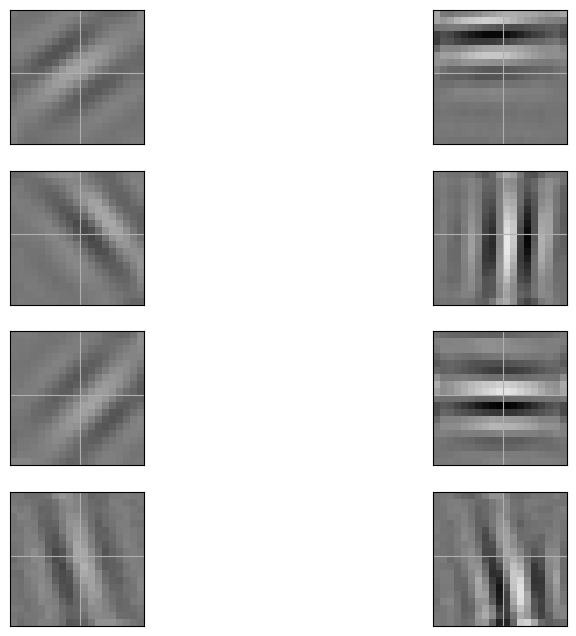

In [23]:
t,y,θ,W=R[-1]
vmin=W.min()
vmax=W.max()

w_im=R.weight_image(W)
count=1
for n in range(4):
    for c in range(2):
        subplot(4,2,count)
        pcolormesh(w_im[n,c,...],cmap=py.cm.gray,
                        vmin=vmin,vmax=vmax)
        ax2=gca()
        ax2.set_aspect('equal')
        ax2.set_xticklabels([])
        ax2.set_yticklabels([])
        ax2.xaxis.set_ticks_position('none') 
        ax2.yaxis.set_ticks_position('none') 
        
        count+=1


In [15]:
# RR={}
# count=0
# for params in tqdm(all_params):
#     RR[params.sfname]=Results(params.sfname)

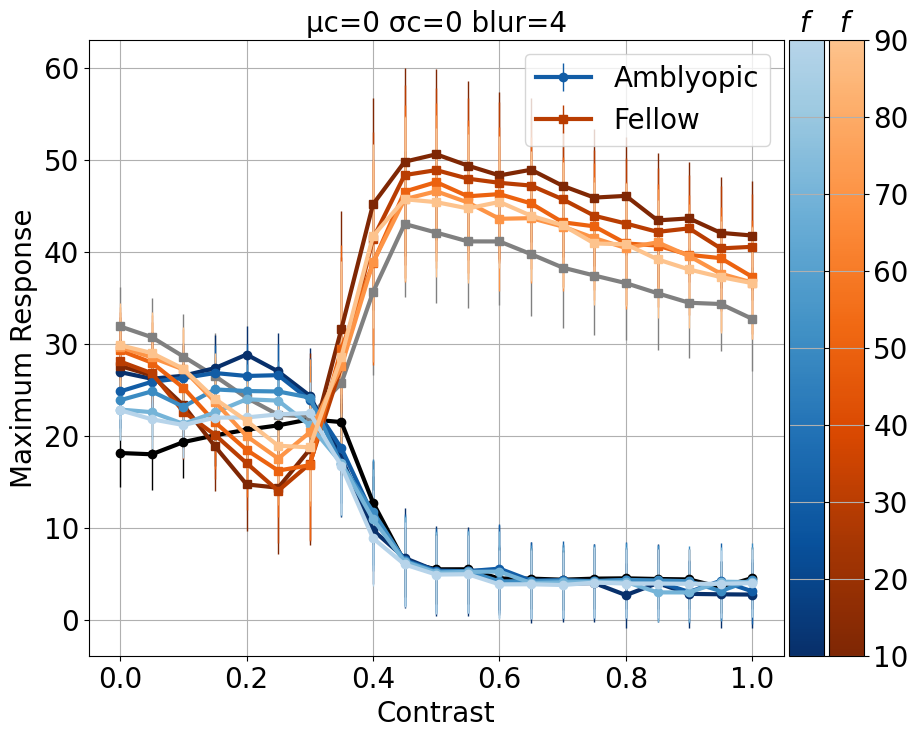

  0%|          | 0/21 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

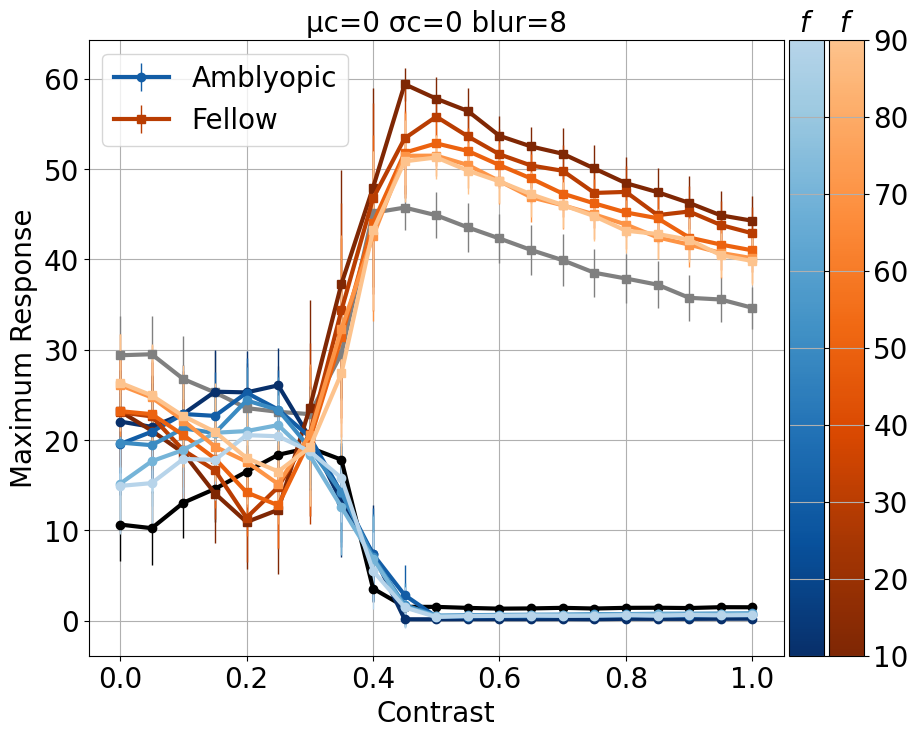

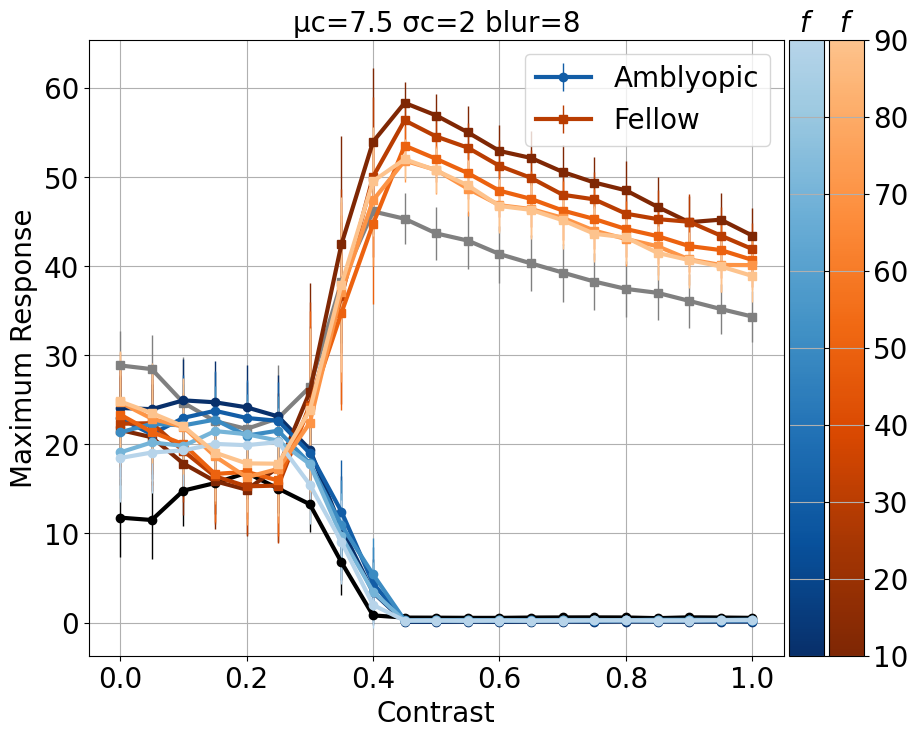

In [24]:
count=0

v=np.flip(linspace(0.3,1,len(f_mat)))

figcount=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    figure()
    for mask in mask_mat:
        if mask:
            for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
                s=Storage()
                for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                    params=all_params[count]
                    count+=1
                    R=Results(params.sfname)
                    #R=RR[params.sfname]
                    contrast=params.contrast
                    μ1,μ2=R.μσ[0][0]
                    σ1,σ2=R.μσ[1][0]

                    s+=contrast,μ1,μ2,σ1,σ2
                    
                contrast,μ1,μ2,σ1,σ2=s.arrays()

                
                if fc==1:
                    errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[fc]))
                    errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[fc]))
                    
                else:
                    errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
                    errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Oranges(v[fc]))
                
        else:
            s=Storage()
            for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                params=all_params[count]
                count+=1
                R=Results(params.sfname)
                #R=RR[params.sfname]
                contrast=params.contrast
                μ1,μ2=R.μσ[0][0]
                σ1,σ2=R.μσ[1][0]

                s+=contrast,μ1,μ2,σ1,σ2

            contrast,μ1,μ2,σ1,σ2=s.arrays()

            errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color='black')
            errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color='gray')
            
                
        xlabel('Contrast')
        ylabel('Maximum Response')
        title(f'μc={mu_c} σc={sigma_c} blur={blur}')
        legend()                        
                    
    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
    ax_cb2.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
    cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    ax_cb.set_yticklabels([])
    ax_cb2.grid(True)
    title(r'$f$')
    plt.gcf().add_axes(ax_cb2)
    title(r'$f$')

    figcount+=1
    
    if figcount==2:
        break

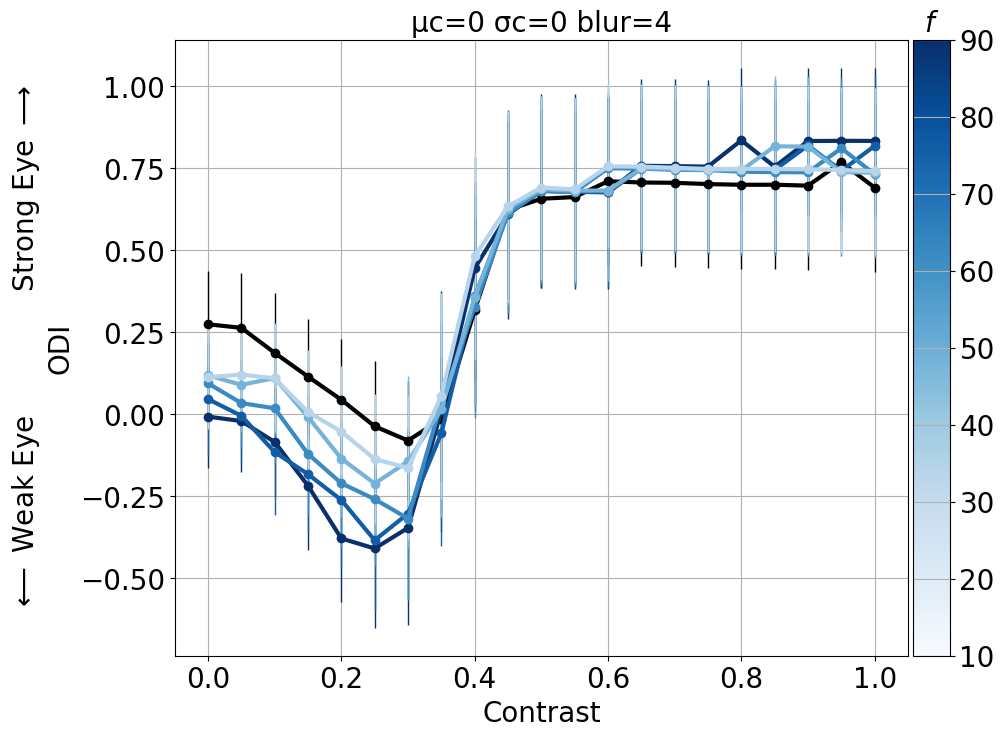

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

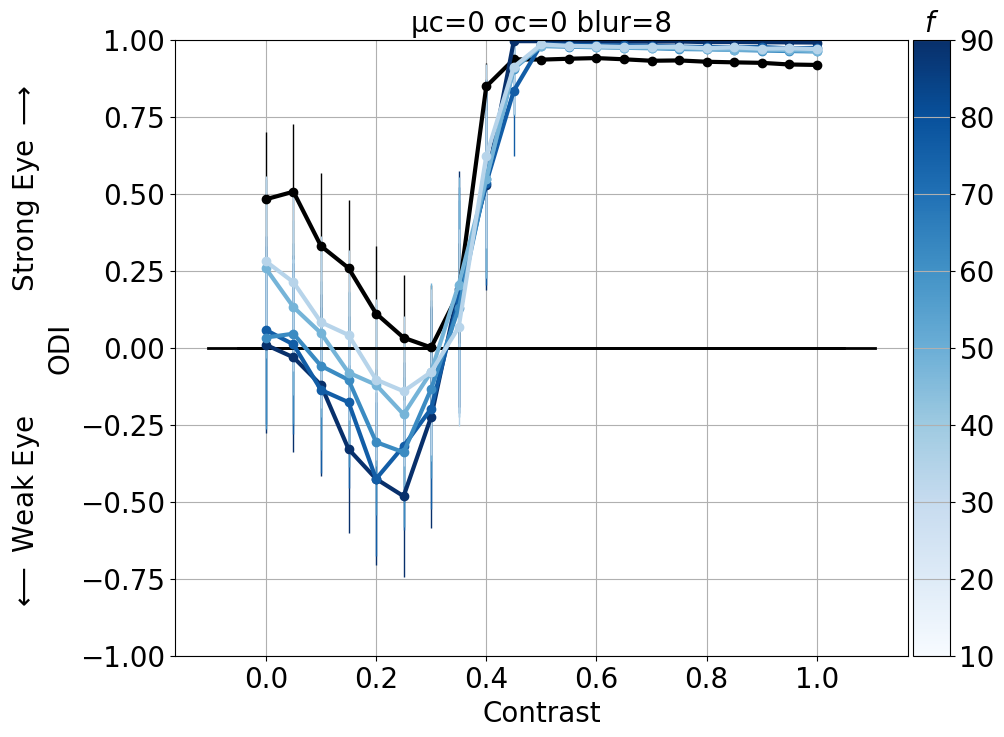

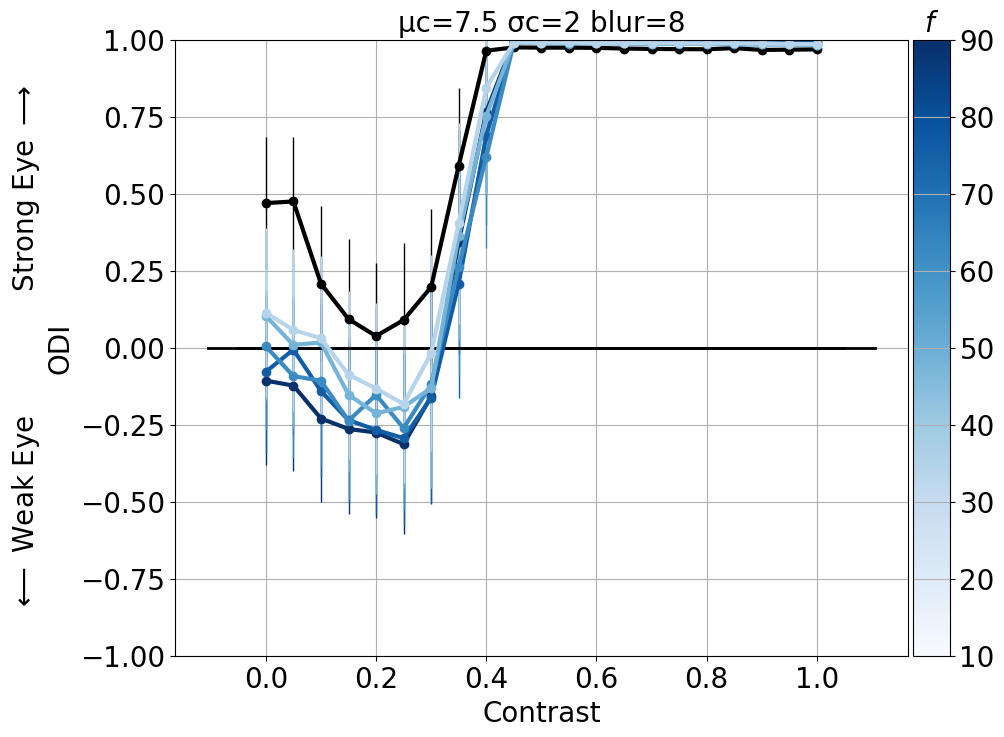

In [25]:
count=0

v=np.flip(linspace(0.3,1,len(f_mat)))
figcount=0

for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    figure()
    for mask in mask_mat:
        if mask:
            for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
                s=Storage()
                for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                    params=all_params[count]
                    count+=1
                    R=Results(params.sfname)
                    #R=RR[params.sfname]
                    contrast=params.contrast
                    μ,σ=μσ(R.ODI[-1])

                    s+=contrast,μ,σ
                    
                contrast,μ,σ=s.arrays()

                
                errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
                
        else:
            s=Storage()
            for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                params=all_params[count]
                count+=1
                R=Results(params.sfname)
                #R=RR[params.sfname]
                contrast=params.contrast
                μ,σ=μσ(R.ODI[-1])

                s+=contrast,μ,σ

            contrast,μ,σ=s.arrays()

            errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color='black')

            
        ylim([-1,1])
        xl=xlim()
        plot(xl,[0,0],'k-',lw=2)
                
        xlabel('Contrast')
        ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
        title(f'μc={mu_c} σc={sigma_c} blur={blur}')

                    

    divider = make_axes_locatable(plt.gca())
    ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
    ax_cb2.grid(False)
    cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
    ax_cb2.grid(True)
    plt.gcf().add_axes(ax_cb2)
    title(r'$f$')



    figcount+=1
    
    if figcount==2:
        break


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

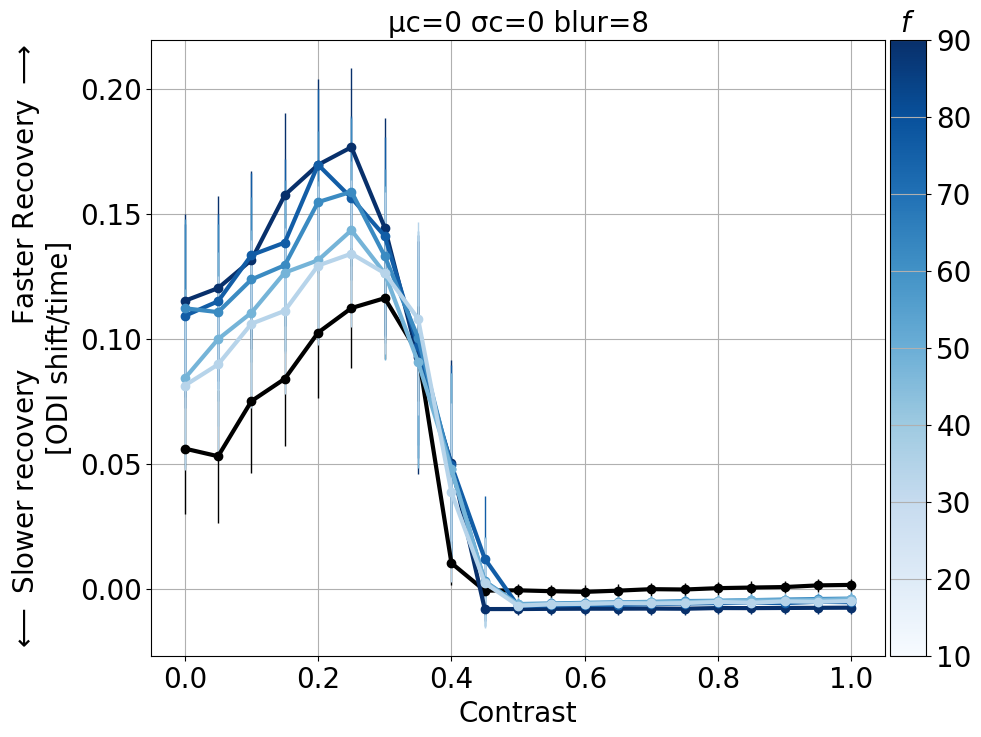

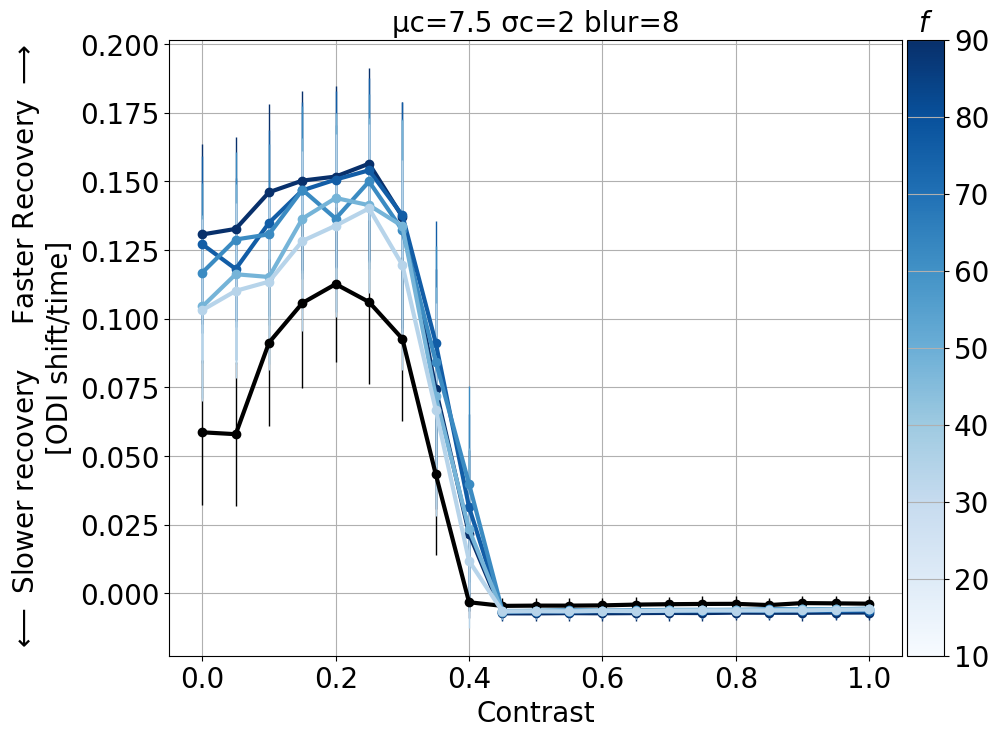

In [26]:
count=0

v=np.flip(linspace(0.3,1,len(f_mat)))
figcount=0

for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    figure()
    for mask in mask_mat:
        if mask:
            for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
                s=Storage()
                for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                    params=all_params[count]
                    count+=1
                    R=Results(params.sfname)
                    #R=RR[params.sfname]
                    contrast=params.contrast
                    t=R.t/day
                    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

                    s+=contrast,recovery_rate_μ,recovery_rate_σ
                    
                contrast,μ,σ=s.arrays()

                
                errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
                
        else:
            s=Storage()
            for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                params=all_params[count]
                count+=1
                R=Results(params.sfname)
                #R=RR[params.sfname]
                contrast=params.contrast
                t=R.t/day
                recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

                s+=contrast,recovery_rate_μ,recovery_rate_σ

            contrast,μ,σ=s.arrays()

            errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color='black')

            
        xlabel('Contrast')
        ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
        title(f'μc={mu_c} σc={sigma_c} blur={blur}')

                    

    divider = make_axes_locatable(plt.gca())
    ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
    ax_cb2.grid(False)
    cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
    ax_cb2.grid(True)
    plt.gcf().add_axes(ax_cb2)
    title(r'$f$')



    figcount+=1
    
    if figcount==2:
        break


In [27]:
mu_c,sigma_c=7.5,2

#[p for p in all_params if p.mu_c==mu_c and p.sigma_c==sigma_c]

In [28]:
count=0


figcount=0
mu_c,sigma_c=0,0
plot_params=[p for p in all_params if p.mu_c==mu_c and p.sigma_c==sigma_c]

fig1_results=[]
fig2_results=[]
fig3_results=[]
for mask in mask_mat:
    if mask:
        for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
            s=Storage()
            s2=Storage()
            s3=Storage()
            for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                params=plot_params[count]
                count+=1
                R=Results(params.sfname)
                #R=RR[params.sfname]
                contrast=params.contrast
                μ1,μ2=R.μσ[0][0]
                σ1,σ2=R.μσ[1][0]

                s+=contrast,μ1,μ2,σ1,σ2
                
                μ,σ=μσ(R.ODI[-1])
                s2+=contrast,μ,σ
                
                t=R.t/day
                recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
                s3+=contrast,recovery_rate_μ,recovery_rate_σ
                
                

            contrast,μ1,μ2,σ1,σ2=s.arrays()
            fig1_results.append( (contrast,μ1,μ2,σ1,σ2,fc,mask) )
            
            contrast,μ,σ=s2.arrays()
            fig2_results.append( (contrast,μ,σ,fc,mask) )
            
            contrast,μ,σ=s3.arrays()
            fig3_results.append( (contrast,μ,σ,fc,mask) )
            

    else:
        s=Storage()
        s2=Storage()
        s3=Storage()
        for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

            params=plot_params[count]
            count+=1
            R=Results(params.sfname)
            #R=RR[params.sfname]
            contrast=params.contrast
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]

            s+=contrast,μ1,μ2,σ1,σ2

            
            μ,σ=μσ(R.ODI[-1])
            s2+=contrast,μ,σ
            
            t=R.t/day
            recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
            s3+=contrast,recovery_rate_μ,recovery_rate_σ
            
            
            
        contrast,μ1,μ2,σ1,σ2=s.arrays()
        fig1_results.append( (contrast,μ1,μ2,σ1,σ2,fc,mask) )

        contrast,μ,σ=s2.arrays()
        fig2_results.append( (contrast,μ,σ,fc,mask) )

        contrast,μ,σ=s3.arrays()
        fig3_results.append( (contrast,μ,σ,fc,mask) )




  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Manuscript/resources/fig-mask-response-ODI-contrast-mu0-sigma0_blur8.png
Manuscript/resources/fig-mask-response-ODI-contrast-mu0-sigma0_blur8.svg


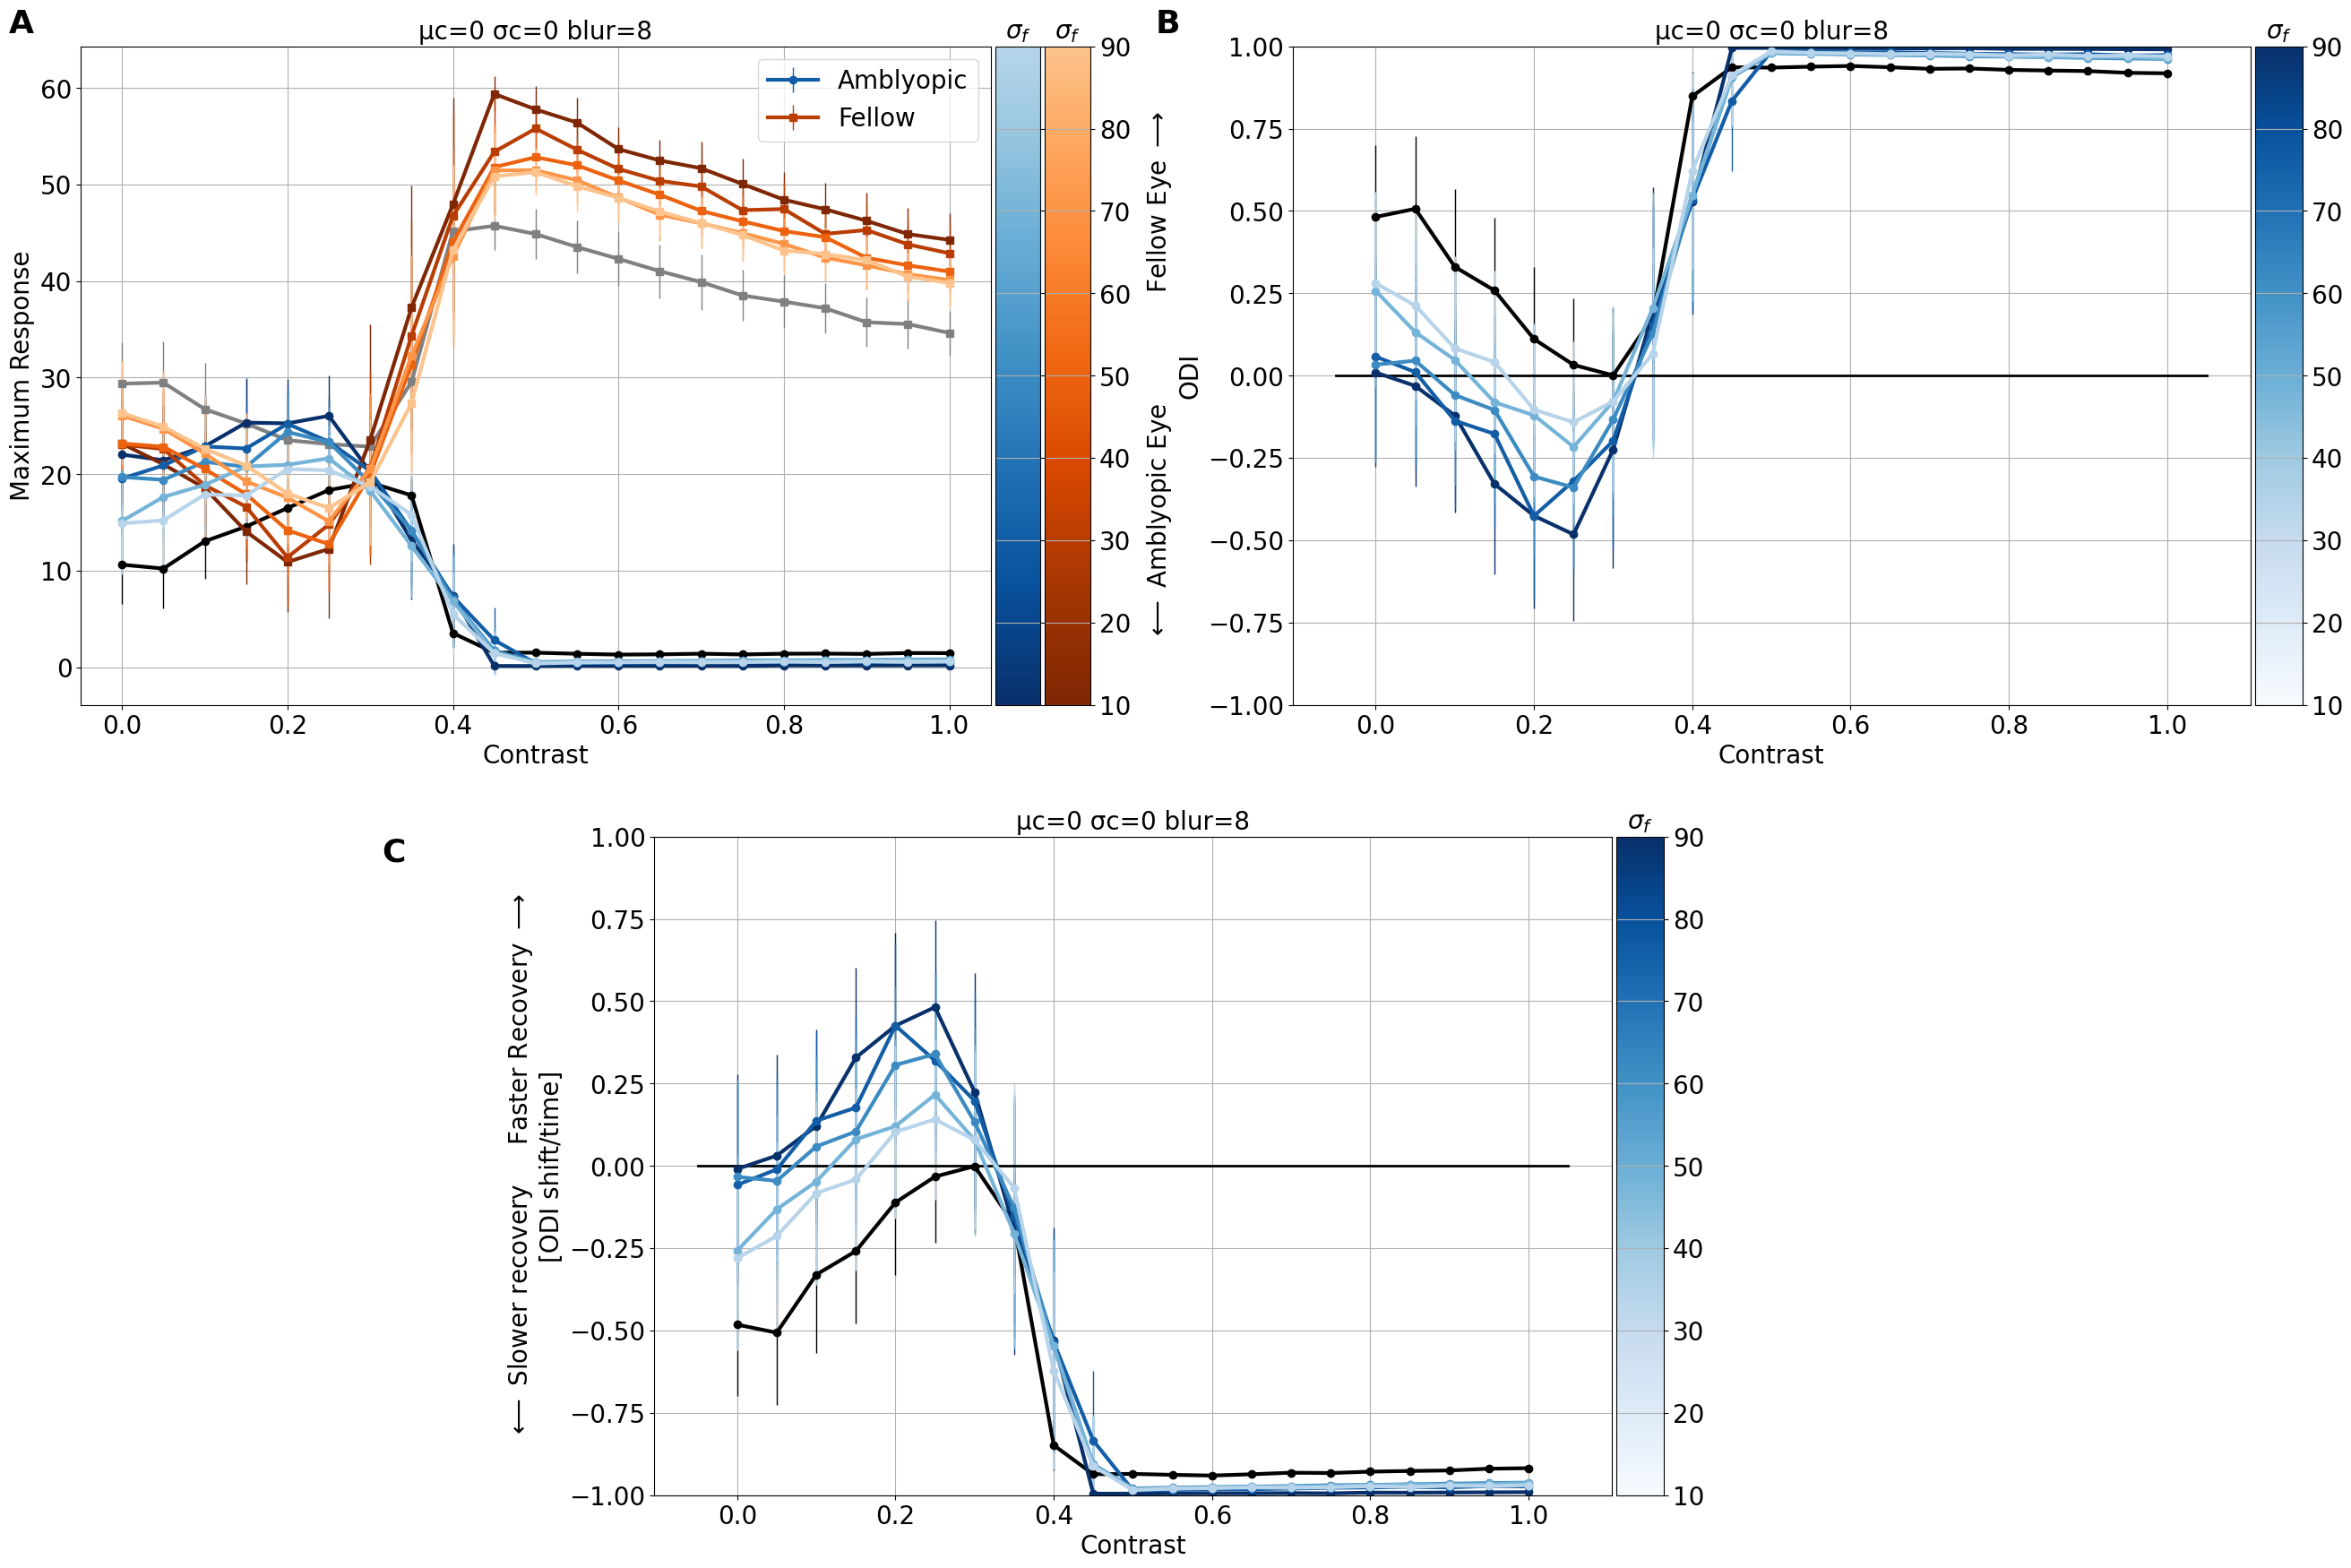

In [29]:
figure(figsize=(32,21))
v=np.flip(linspace(0.3,1,len(f_mat)))

subplot(2,2,1)

for contrast,μ1,μ2,σ1,σ2,fc,mask in fig1_results:
    if mask:
        if fc==1:
            errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[fc]))
            errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[fc]))

        else:
            errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
            errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Oranges(v[fc]))
    else:
        errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color='black')
        errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color='gray')
        
xlabel('Contrast')
ylabel('Maximum Response')
title(f'μc={mu_c} σc={sigma_c} blur={blur}')
legend()                        
        
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
ax_cb.set_yticklabels([])
ax_cb2.grid(True)
title(r'$\sigma_f$') 
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 

subplot(2,2,2)

for contrast,μ,σ,fc,mask in fig2_results:
    if mask:
        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
    else:
        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color='black')
        
    
            
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

xlabel('Contrast')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
title(f'μc={mu_c} σc={sigma_c} blur={blur}')

divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 

ax=subplot(2,2,3)
pos=ax.get_position().bounds
ax.set_position([pos[0]+.2,pos[1],pos[2],pos[3]])

for contrast,μ,σ,fc,mask in fig2_results:
    if mask:
        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
    else:
        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color='black')
        
    
            
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

xlabel('Contrast')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
title(f'μc={mu_c} σc={sigma_c} blur={blur}')

divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 


plt.text(.1, 0.9, "A", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')


plt.text(.23, 0.46, "C", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

savefig('fig-mask-response-ODI-contrast-mu0-sigma0_blur8.png')    
        

In [30]:
count=0


figcount=0
mu_c,sigma_c=7.5,2
plot_params=[p for p in all_params if p.mu_c==mu_c and p.sigma_c==sigma_c]

fig1_results=[]
fig2_results=[]
fig3_results=[]
for mask in mask_mat:
    if mask:
        for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
            s=Storage()
            s2=Storage()
            s3=Storage()
            for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                params=plot_params[count]
                count+=1
                R=Results(params.sfname)
                #R=RR[params.sfname]
                contrast=params.contrast
                μ1,μ2=R.μσ[0][0]
                σ1,σ2=R.μσ[1][0]

                s+=contrast,μ1,μ2,σ1,σ2
                
                μ,σ=μσ(R.ODI[-1])
                s2+=contrast,μ,σ
                
                t=R.t/day
                recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
                s3+=contrast,recovery_rate_μ,recovery_rate_σ
                
                

            contrast,μ1,μ2,σ1,σ2=s.arrays()
            fig1_results.append( (contrast,μ1,μ2,σ1,σ2,fc,mask) )
            
            contrast,μ,σ=s2.arrays()
            fig2_results.append( (contrast,μ,σ,fc,mask) )
            
            contrast,μ,σ=s3.arrays()
            fig3_results.append( (contrast,μ,σ,fc,mask) )
            

    else:
        s=Storage()
        s2=Storage()
        s3=Storage()
        for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

            params=plot_params[count]
            count+=1
            R=Results(params.sfname)
            #R=RR[params.sfname]
            contrast=params.contrast
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]

            s+=contrast,μ1,μ2,σ1,σ2

            
            μ,σ=μσ(R.ODI[-1])
            s2+=contrast,μ,σ
            
            t=R.t/day
            recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
            s3+=contrast,recovery_rate_μ,recovery_rate_σ
            
            
            
        contrast,μ1,μ2,σ1,σ2=s.arrays()
        fig1_results.append( (contrast,μ1,μ2,σ1,σ2,fc,mask) )

        contrast,μ,σ=s2.arrays()
        fig2_results.append( (contrast,μ,σ,fc,mask) )

        contrast,μ,σ=s3.arrays()
        fig3_results.append( (contrast,μ,σ,fc,mask) )




  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Manuscript/resources/fig-mask-response-ODI-contrast-mu75-sigma2_blur8.png
Manuscript/resources/fig-mask-response-ODI-contrast-mu75-sigma2_blur8.svg


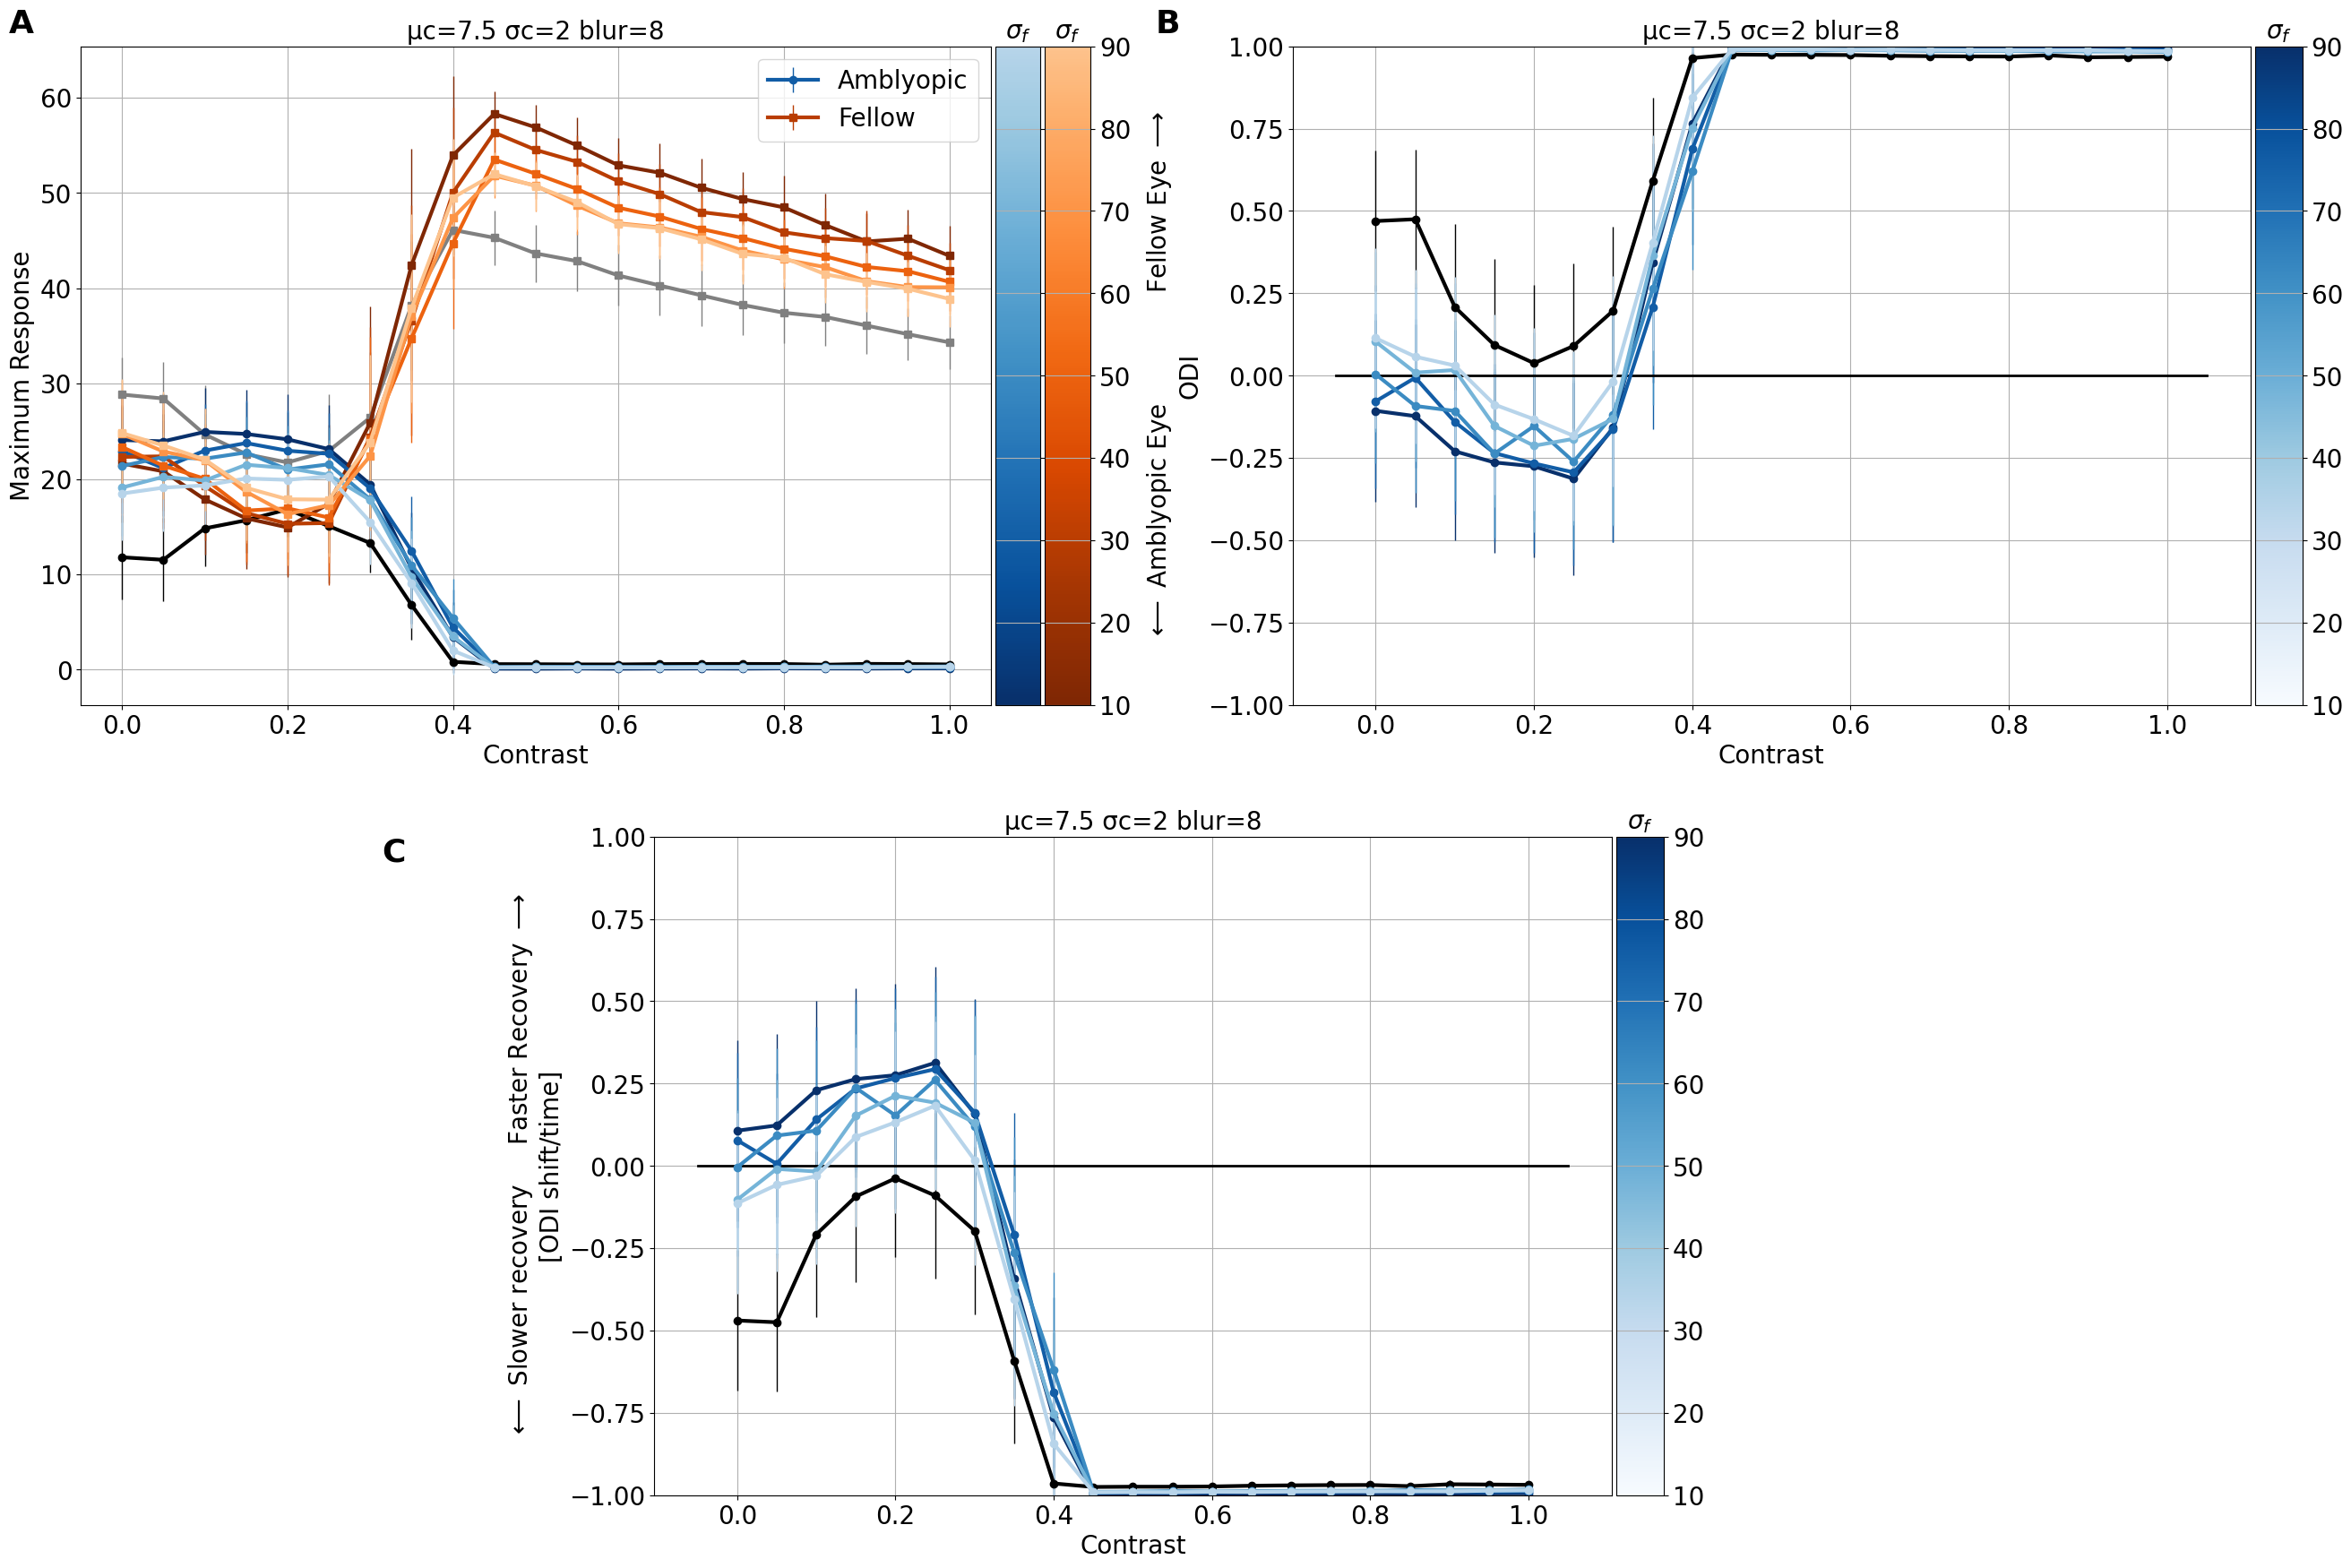

In [31]:
figure(figsize=(32,21))
v=np.flip(linspace(0.3,1,len(f_mat)))

subplot(2,2,1)

for contrast,μ1,μ2,σ1,σ2,fc,mask in fig1_results:
    if mask:
        if fc==1:
            errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[fc]))
            errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[fc]))

        else:
            errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
            errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Oranges(v[fc]))
    else:
        errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color='black')
        errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color='gray')
        
xlabel('Contrast')
ylabel('Maximum Response')
title(f'μc={mu_c} σc={sigma_c} blur={blur}')
legend()                        
        
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
ax_cb.set_yticklabels([])
ax_cb2.grid(True)
title(r'$\sigma_f$') 
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 

subplot(2,2,2)

for contrast,μ,σ,fc,mask in fig2_results:
    if mask:
        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
    else:
        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color='black')
        
    
            
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

xlabel('Contrast')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
title(f'μc={mu_c} σc={sigma_c} blur={blur}')

divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 

ax=subplot(2,2,3)
pos=ax.get_position().bounds
ax.set_position([pos[0]+.2,pos[1],pos[2],pos[3]])

for contrast,μ,σ,fc,mask in fig2_results:
    if mask:
        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
    else:
        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color='black')
        
    
            
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

xlabel('Contrast')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
title(f'μc={mu_c} σc={sigma_c} blur={blur}')

divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 


plt.text(.1, 0.9, "A", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')


plt.text(.23, 0.46, "C", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

savefig('fig-mask-response-ODI-contrast-mu75-sigma2_blur8.png')    
        